#**Prediction of students dropout and academic success**

#Índex


non trivial dataset -CLASSIFICATION TASK
- preprocessing data +justificar documentacio
- aplicar metodes teoria algoritmes -> buscar millors parametres
    justificar els parametres +explicacio del procediemt
    amb test de parametres a la docu tmb
- interpretar models retornen algoritme --> SOBRETOT decision trees
- evaluar i comparar diferents metodes aplicats
- decidir quin metode es millor pel dataset

ACCURACY molt important

In [ ]:
# !pip3 install -U ucimlrepo
# !pip3 install --upgrade certifi

# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# #predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

# # Now try to fetch the dataset again
# predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)
# data=fetch_ucirepo(id=697)
# # data (as pandas dataframes)
# X = predict_students_dropout_and_academic_success.data.features
# y = predict_students_dropout_and_academic_success.data.targets

# # metadata
# #print(predict_students_dropout_and_academic_success.metadata)

# # variable information
# print(predict_students_dropout_and_academic_success.variables)
# df=predict_students_dropout_and_academic_success.data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as cv
import sklearn.neighbors as nb
import seaborn as sns

import pandas
from pandas import plotting

%matplotlib inline

In [ ]:
#https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
#WEB DADES

In [ ]:
###DRIVE FUNCIONA DADES I DADES2


!pip3 install -U ucimlrepo
!pip3 install --upgrade certifi

from ucimlrepo import fetch_ucirepo

# fetch dataset
#predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Now try to fetch the dataset again
dades = fetch_ucirepo(id=697)
# data (as pandas dataframes)
X = dades.data.features
Y = dades.data.targets

# metadata
#print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(dades.variables)
dades2=dades.data

                                              name     role         type  \
0                                   Marital Status  Feature      Integer   
1                                 Application mode  Feature      Integer   
2                                Application order  Feature      Integer   
3                                           Course  Feature      Integer   
4                       Daytime/evening attendance  Feature      Integer   
5                           Previous qualification  Feature      Integer   
6                   Previous qualification (grade)  Feature   Continuous   
7                                      Nacionality  Feature      Integer   
8                           Mother's qualification  Feature      Integer   
9                           Father's qualification  Feature      Integer   
10                             Mother's occupation  Feature      Integer   
11                             Father's occupation  Feature      Integer   
12          

**Exemple primeres 20 files del dataset amb el seu Target**

In [ ]:
print(X.head(20))
print(Y.head(20))

    Marital Status  Application mode  Application order  Course  \
0                1                17                  5     171   
1                1                15                  1    9254   
2                1                 1                  5    9070   
3                1                17                  2    9773   
4                2                39                  1    8014   
5                2                39                  1    9991   
6                1                 1                  1    9500   
7                1                18                  4    9254   
8                1                 1                  3    9238   
9                1                 1                  1    9238   
10               1                 1                  1    9670   
11               1                 1                  1    9500   
12               1                 1                  2    9853   
13               1                53                  1    925

# Inspecció de les dades

In [ ]:
#columnes del dataset
print("Informació de cada columna: ")
names=dades['data']['features'].info()

print("Comprovació dels noms de les columnes: ")
print(dades2.features.columns)

print("-----------")
print("Estadistiques de les Columnes (Variables) (X):")
descript_X = X.describe(include="all")
print(descript_X)

print("Descripció dels valors de Columnes :")
valunicX=X.apply(lambda col:col.unique())
print(valunicX)

print("-----------")
print("Estadistiques de les Files (Target) (y):")
descript_Y = Y.describe(include="all")
print(descript_Y)

print("Descripció dels valors de Target :")
valunicY=dades2.targets['Target'].unique()
print(valunicY)
#Fixar sobre tot amb els valors de UNIQUE i veure possibles errades

Informació de cada columna: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qua

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#PER ELS COLORS!!!

num_colors = 3
cmap = cm.get_cmap('plasma', num_colors)

# Get a list of colors in names (not codes)
colors = [cmap(i) for i in range(num_colors)]

# Display the list of colors
print(colors)


[(0.050383, 0.029803, 0.527975, 1.0), (0.798216, 0.280197, 0.469538, 1.0), (0.940015, 0.975158, 0.131326, 1.0)]


<ipython-input-47-55405f1e5a92>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma', num_colors)


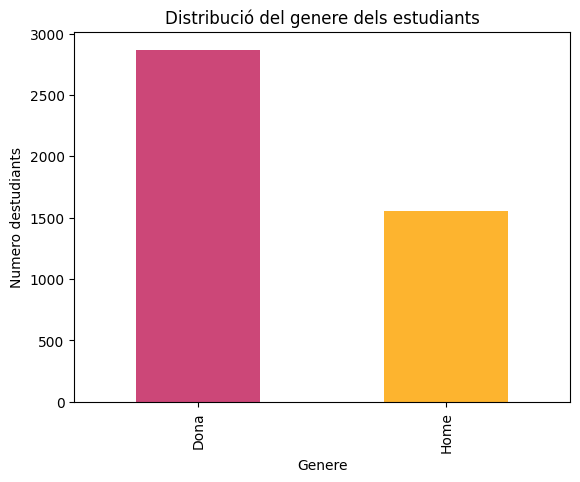

In [ ]:
#Relacio del genere entre els estudiants
gender_counts = dades2.features['Gender'].value_counts()
colors2=[(0.798216, 0.280197, 0.469538, 1.0), (0.993814, 0.704741, 0.183043, 1.0)]

gender_counts.plot(kind='bar',color=colors2)

plt.xlabel('Genere')
plt.xticks([0, 1], ['Dona', 'Home'])#1 male 0 female
plt.ylabel('Numero destudiants')
plt.title('Distribució del genere dels estudiants')

plt.show()

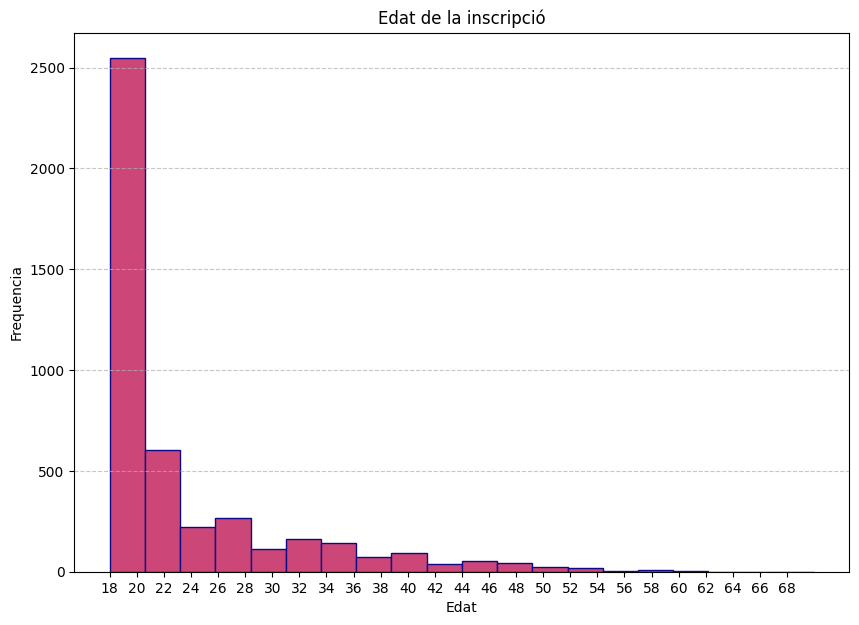

In [ ]:
#Relació d'edat dels estudiants
num_bins = 20
age_range = (18, 70)

plt.figure(figsize=(10, 7))
plt.hist(dades2.features["Age at enrollment"], bins=num_bins,range=age_range,color=(0.798216, 0.280197, 0.469538, 1.0), edgecolor=(0.050383, 0.029803, 0.527975, 1.0))

plt.title("Edat de la inscripció")
plt.xlabel("Edat")
plt.ylabel("Frequencia")
plt.xticks(range(18, 70, 2))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

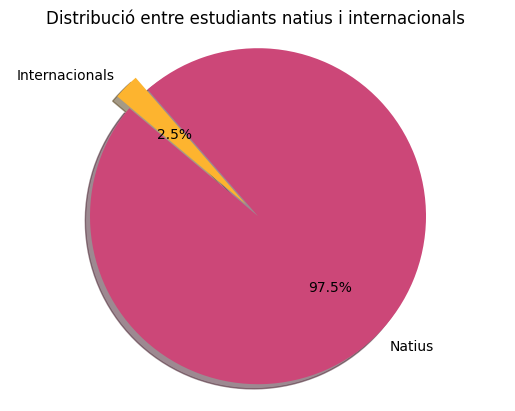

In [ ]:
# Relacion entre estudiants natius i internacionals International = 0, Nationality = 1
nat = dades2.features[(dades2.features["International"] == 0) & (dades2.features["Nacionality"] == 1)].shape[0]
inter = dades2.features[dades2.features["International"] == 1].shape[0]

#pie chart
labels = ['Natius', 'Internacionals']
sizes = [nat, inter]
explode = (0.1, 0)
colors2=[(0.798216, 0.280197, 0.469538, 1.0), (0.993814, 0.704741, 0.183043, 1.0)]

plt.pie(sizes, explode=explode, labels=labels, colors=colors2, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribució entre estudiants natius i internacionals ')
plt.show()

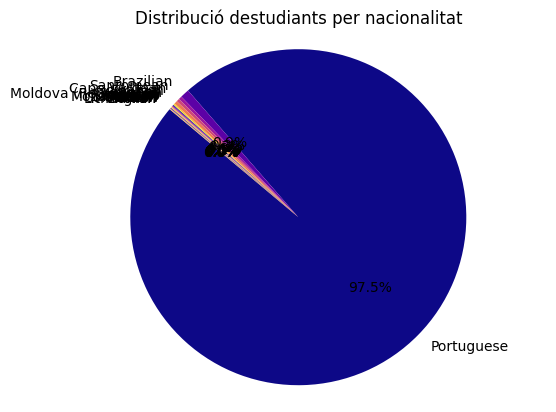

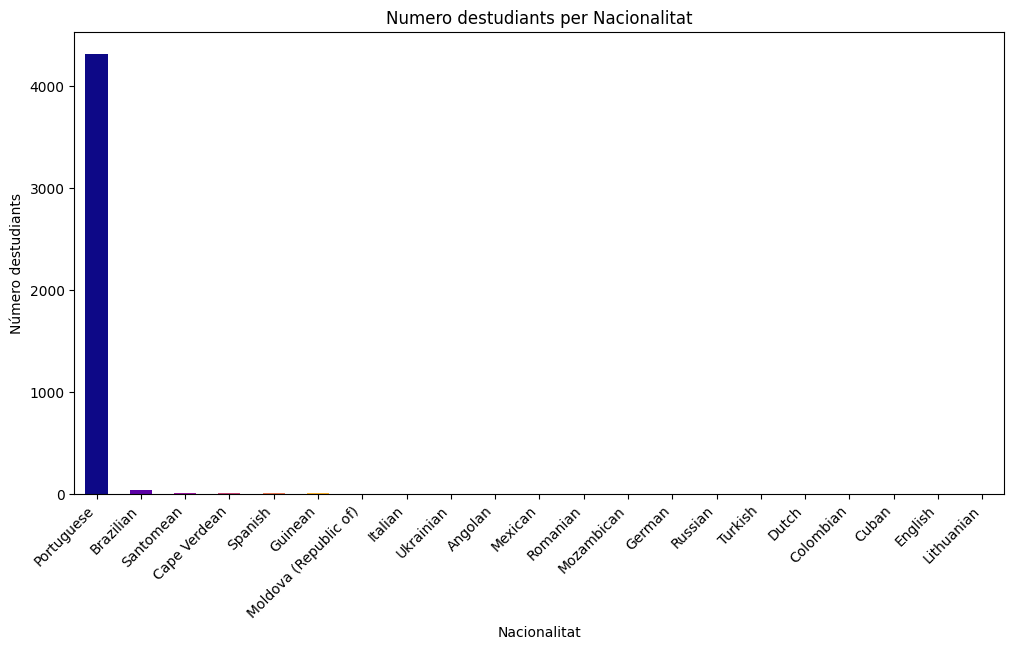

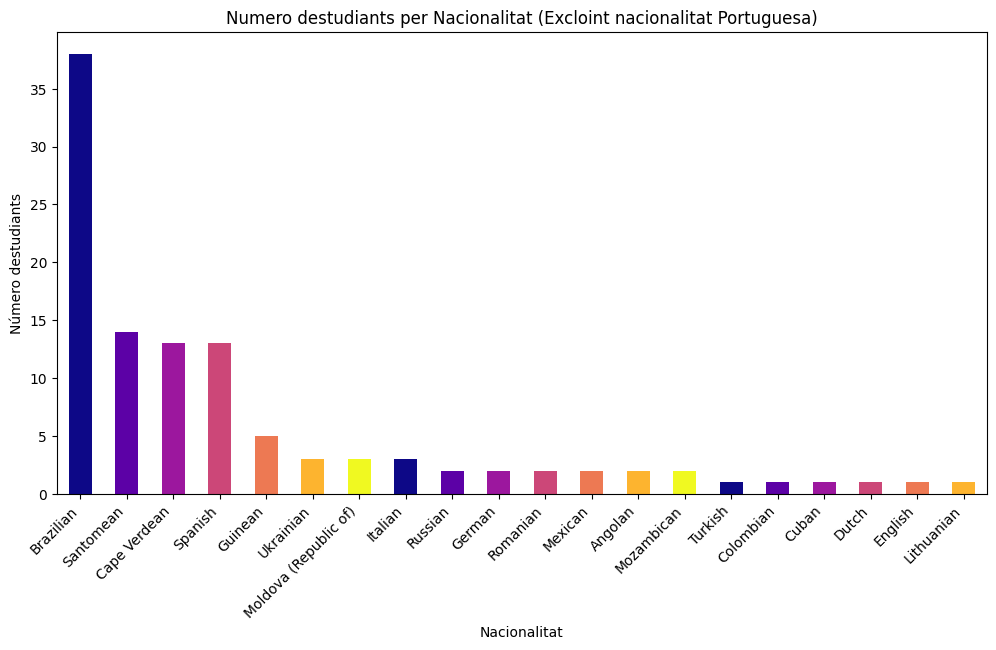

In [ ]:
#Relació entre les diferents nacionalitats
nat_noms = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch',
    14: 'English', 17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean',
    24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish',
    41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
    109: 'Colombian'
}
nat_num = dades2.features['Nacionality'].map(nat_noms).value_counts()
colors=[(0.050383, 0.029803, 0.527975, 1.0),
 (0.362553, 0.003243, 0.649245, 1.0),
  (0.610667, 0.090204, 0.619951, 1.0),
   (0.798216, 0.280197, 0.469538, 1.0),
    (0.928329, 0.472975, 0.326067, 1.0),
     (0.993814, 0.704741, 0.183043, 1.0),
        (0.940015, 0.975158, 0.131326, 1.0)]

#Pie chart nacionalitats
labels = nat_num.index
sizes = nat_num.values
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribució destudiants per nacionalitat')
plt.show()

#bar chart nacioalitats
plt.figure(figsize=(12, 6))
nat_num.plot(kind='bar', color=colors)
plt.xlabel('Nacionalitat')
plt.ylabel('Número destudiants')
plt.title('Numero destudiants per Nacionalitat')
plt.xticks(rotation=45, ha='right')
plt.show()

#Extreure la nacionalitat Portuguesa- Contar només els internacionals
nat_num = dades2.features['Nacionality'].map(nat_noms)
nat_num = nat_num[nat_num != 'Portuguese'].value_counts()

plt.figure(figsize=(12, 6))
nat_num.plot(kind='bar', color=colors)
plt.xlabel('Nacionalitat')
plt.ylabel('Número destudiants')
plt.title('Numero destudiants per Nacionalitat (Excloint nacionalitat Portuguesa)')
plt.xticks(rotation=45, ha='right')

plt.show()

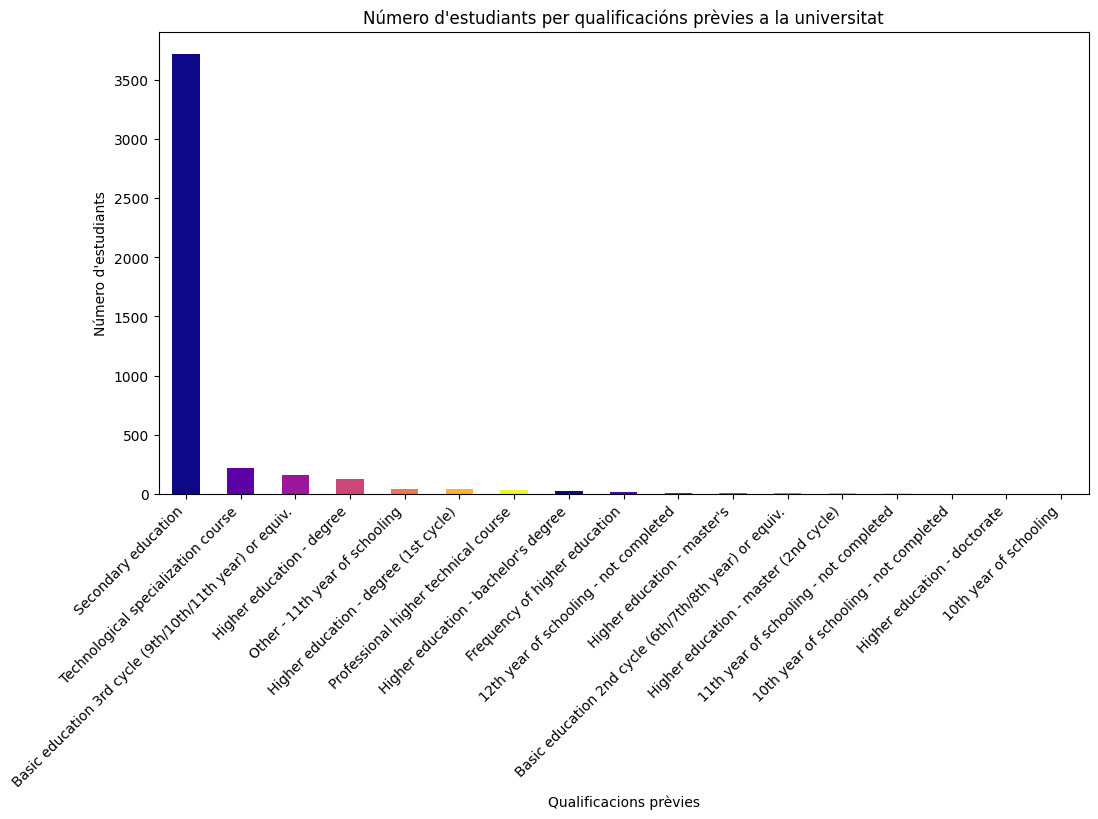

In [ ]:
#Qualificació previa a la universitat
prev_noms = {
    1: 'Secondary education',
    2: "Higher education - bachelor's degree",
    3: 'Higher education - degree',
    4: "Higher education - master's",
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}
prev_num = dades2.features['Previous qualification'].map(prev_noms).value_counts()

colors=[(0.050383, 0.029803, 0.527975, 1.0),
 (0.362553, 0.003243, 0.649245, 1.0),
  (0.610667, 0.090204, 0.619951, 1.0),
   (0.798216, 0.280197, 0.469538, 1.0),
    (0.928329, 0.472975, 0.326067, 1.0),
     (0.993814, 0.704741, 0.183043, 1.0),
        (0.940015, 0.975158, 0.131326, 1.0)]

plt.figure(figsize=(12, 6))
plt.xlabel("Qualificacions prèvies")
plt.ylabel("Número d'estudiants")
plt.title("Número d'estudiants per qualificacións prèvies a la universitat")
prev_num.plot(kind='bar',color=colors)
plt.xticks(rotation=45, ha='right')

plt.show()

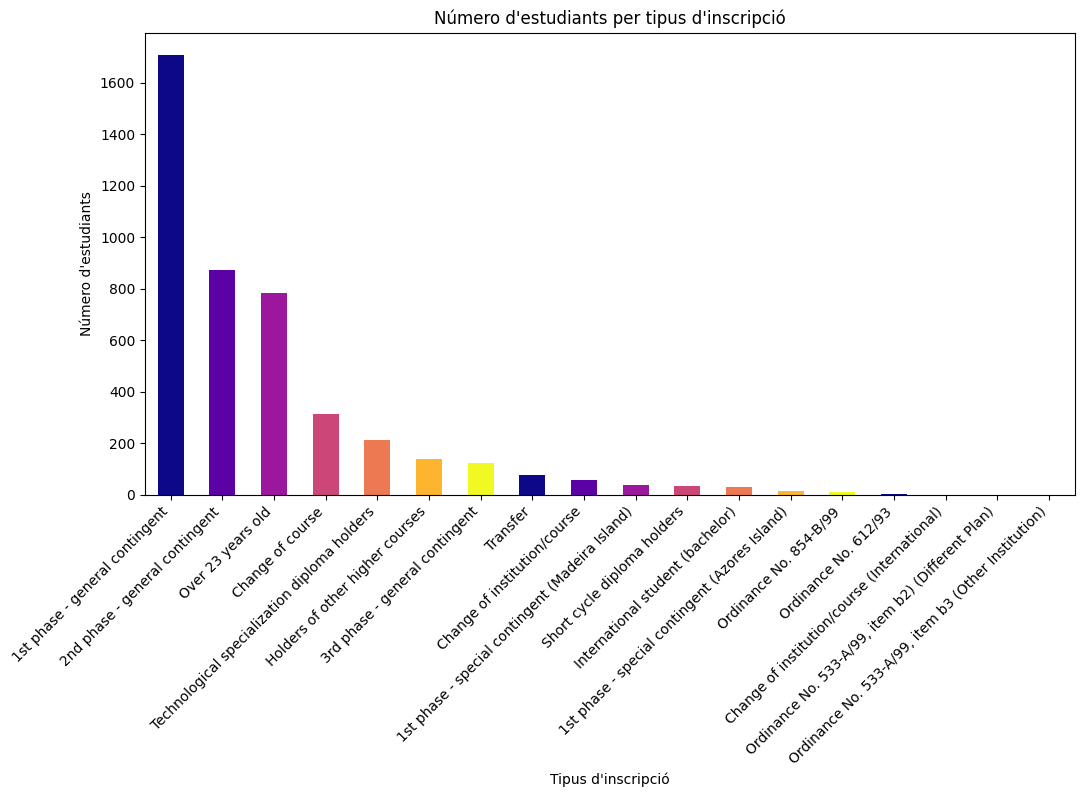

In [ ]:
# Relacio estudiants per tipus d'aplicació
applic_nom = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}
applic_num = dades2.features['Application mode'].map(applic_nom).value_counts()

colors=[(0.050383, 0.029803, 0.527975, 1.0),
 (0.362553, 0.003243, 0.649245, 1.0),
  (0.610667, 0.090204, 0.619951, 1.0),
   (0.798216, 0.280197, 0.469538, 1.0),
    (0.928329, 0.472975, 0.326067, 1.0),
     (0.993814, 0.704741, 0.183043, 1.0),
        (0.940015, 0.975158, 0.131326, 1.0)]

plt.figure(figsize=(12, 6))
plt.xlabel("Tipus d'inscripció")
plt.ylabel("Número d'estudiants")
plt.title("Número d'estudiants per tipus d'inscripció")
applic_num.plot(kind='bar',color=colors)
plt.xticks(rotation=45, ha='right')

plt.show()


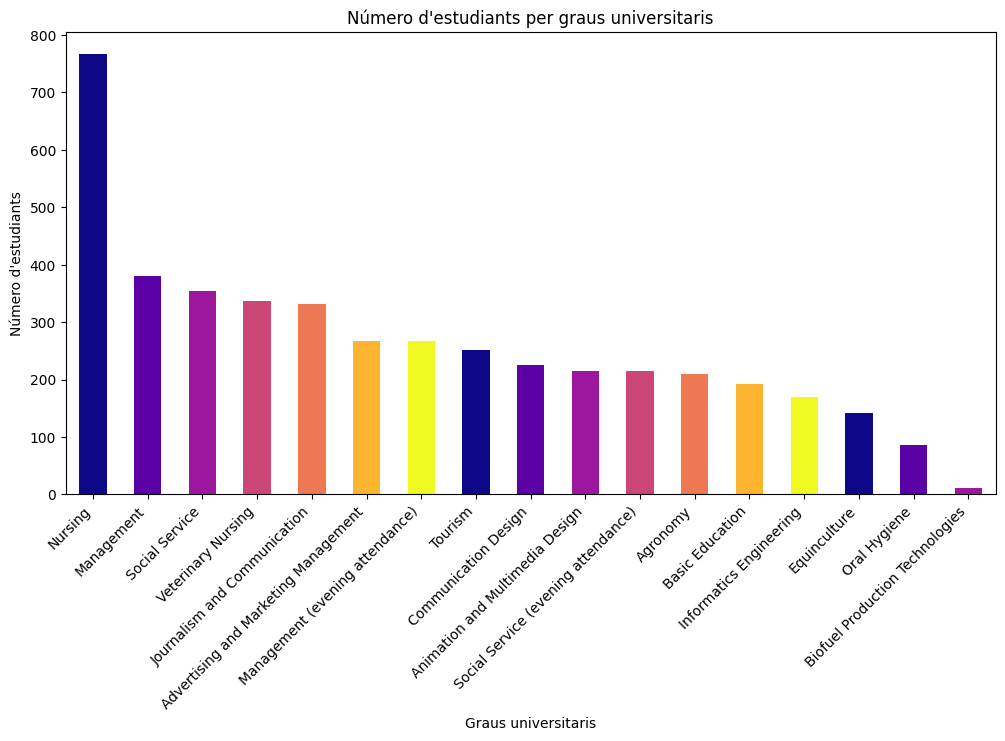

In [ ]:
#Relació del grau i el nombre d'estudiants
course_noms = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

course_counts = dades2.features['Course'].map(course_noms).value_counts()

colors = [
    (0.050383, 0.029803, 0.527975, 1.0),
    (0.362553, 0.003243, 0.649245, 1.0),
    (0.610667, 0.090204, 0.619951, 1.0),
    (0.798216, 0.280197, 0.469538, 1.0),
    (0.928329, 0.472975, 0.326067, 1.0),
    (0.993814, 0.704741, 0.183043, 1.0),
    (0.940015, 0.975158, 0.131326, 1.0)
]

plt.figure(figsize=(12, 6))
plt.xlabel("Graus universitaris")
plt.ylabel("Número d'estudiants")
plt.title("Número d'estudiants per graus universitaris")
course_counts.plot(kind='bar', color=colors)
plt.xticks(rotation=45, ha='right')

plt.show()


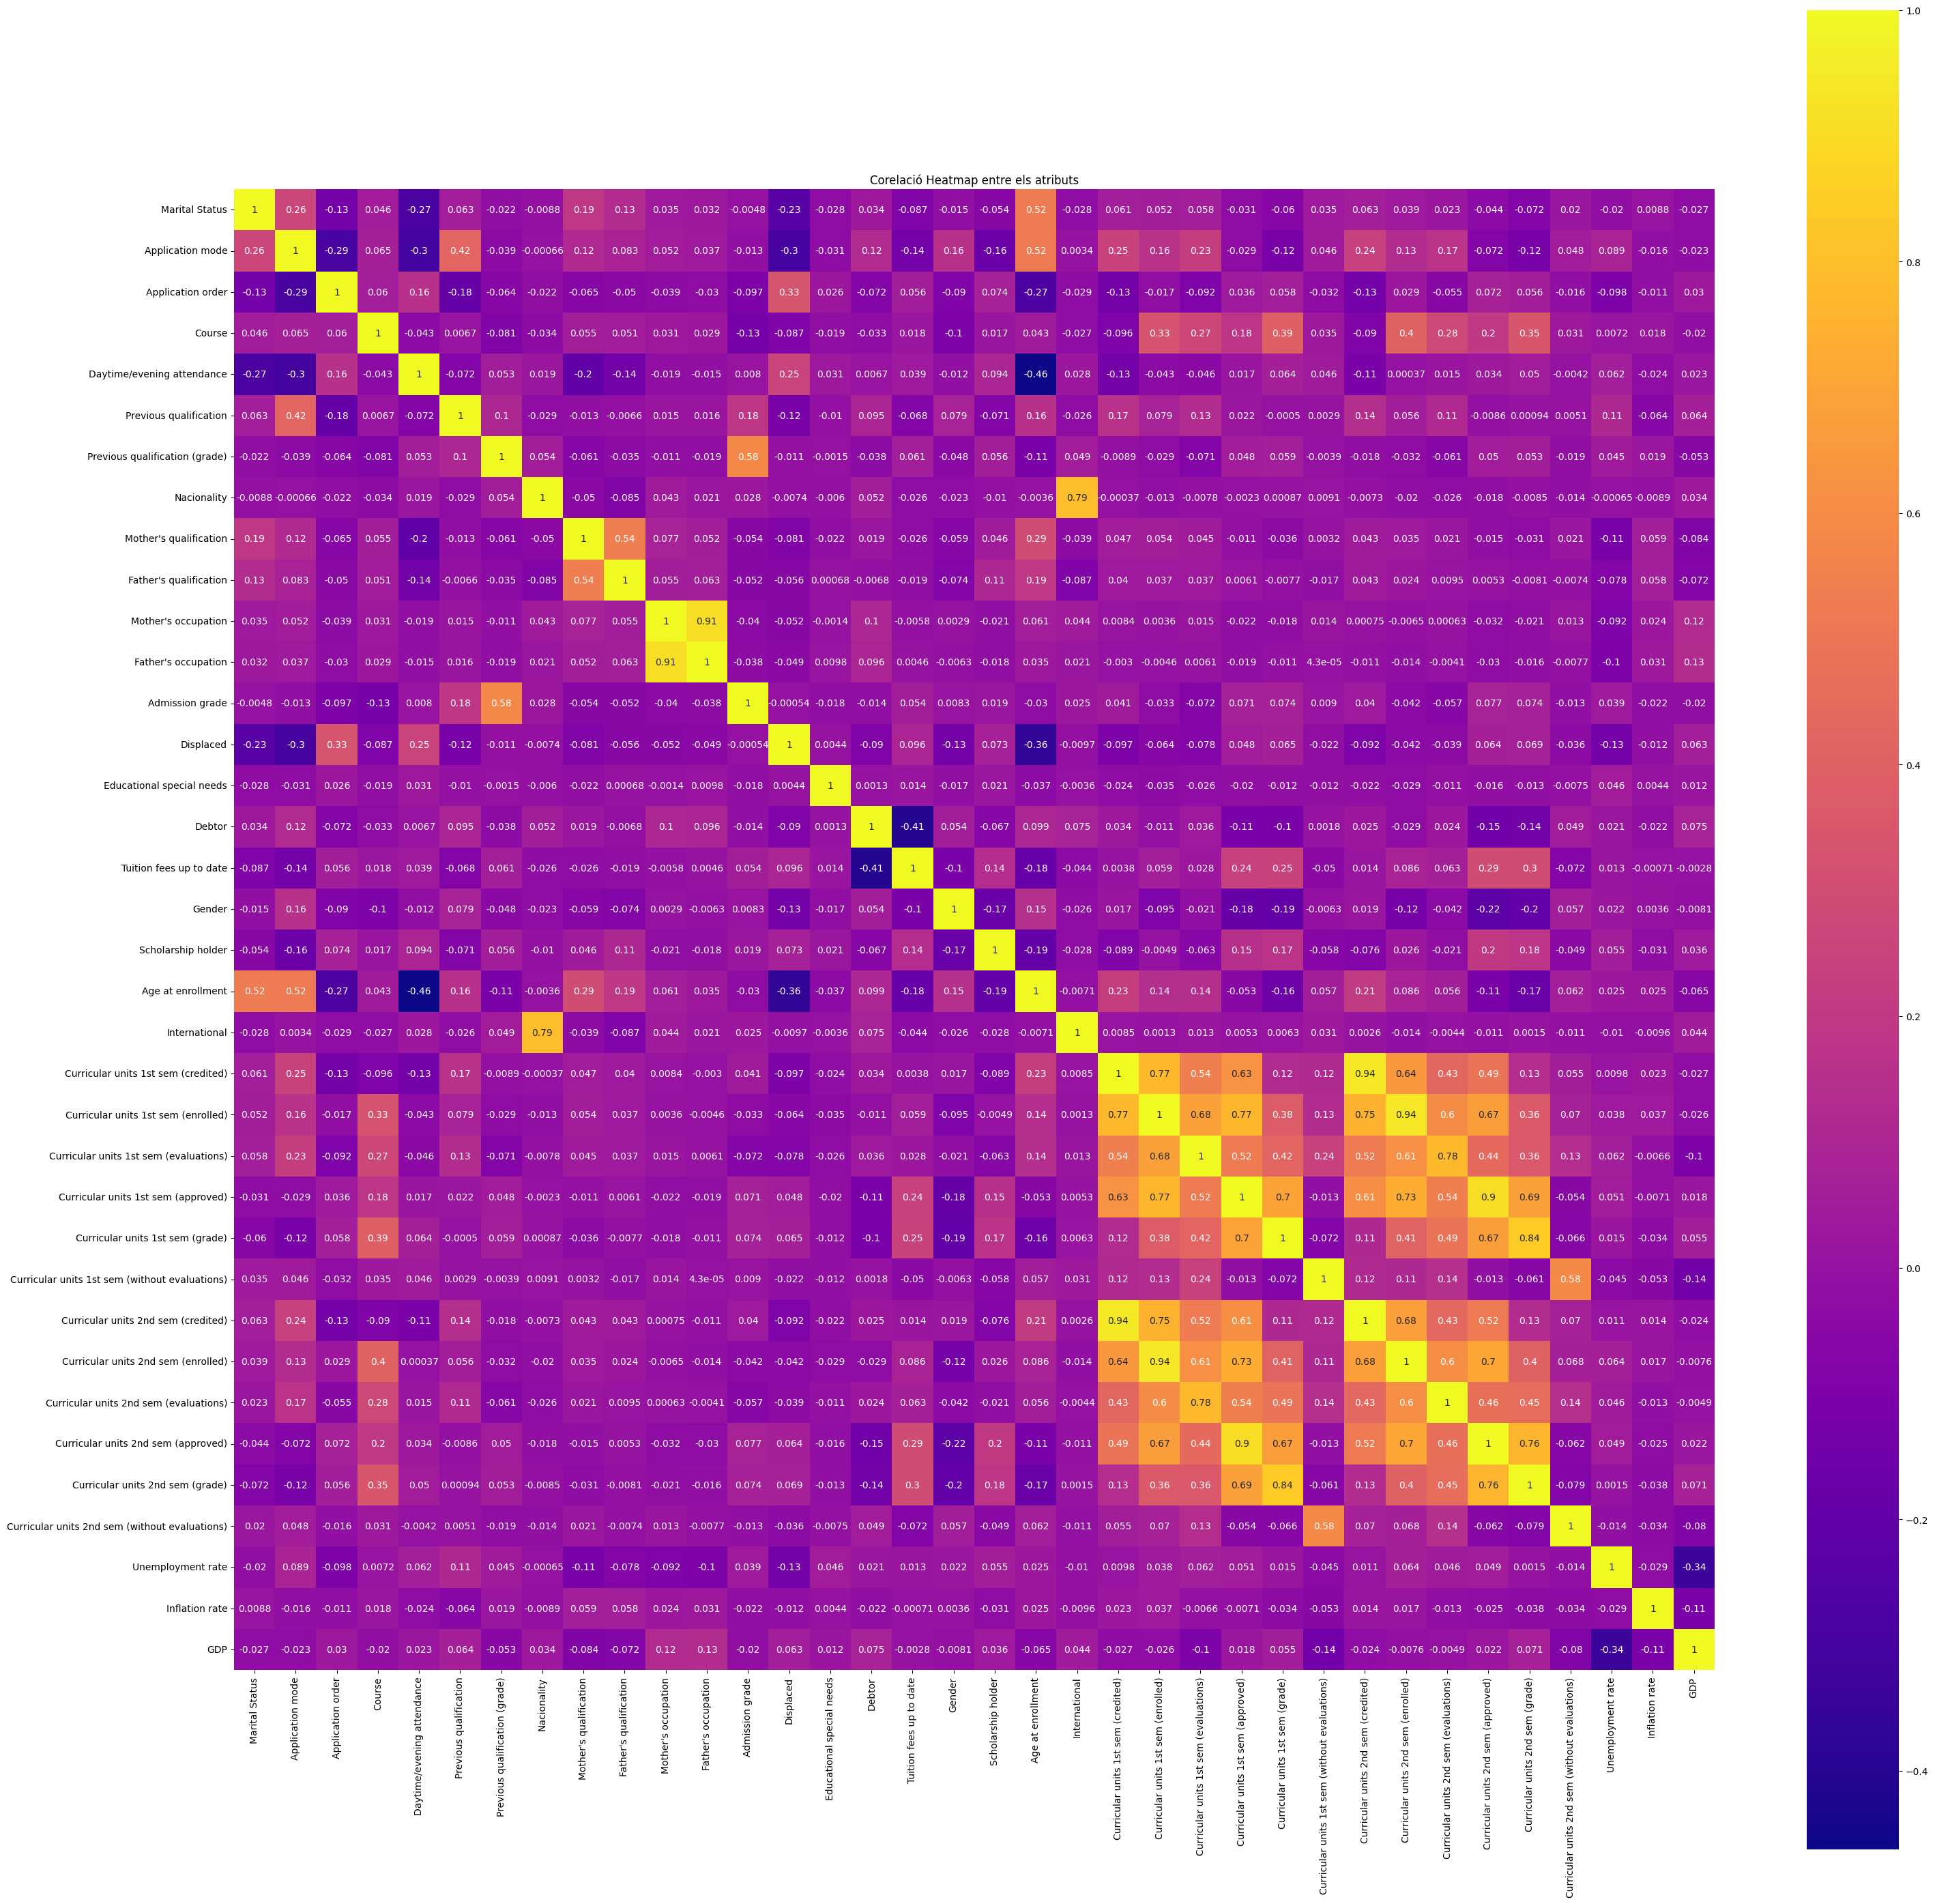

In [ ]:
#Matriu de correlació entre atributs
corr = dades2.features.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(35, 35))
sns.heatmap(corr, cmap='plasma', annot=True, square=True)

plt.title("Corelació Heatmap entre els atributs")
plt.show()

array([[<Axes: title={'center': 'Marital Status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance'}>,
        <Axes: title={'center': 'Previous qualification'}>],
       [<Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>],
       [<Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>],
     

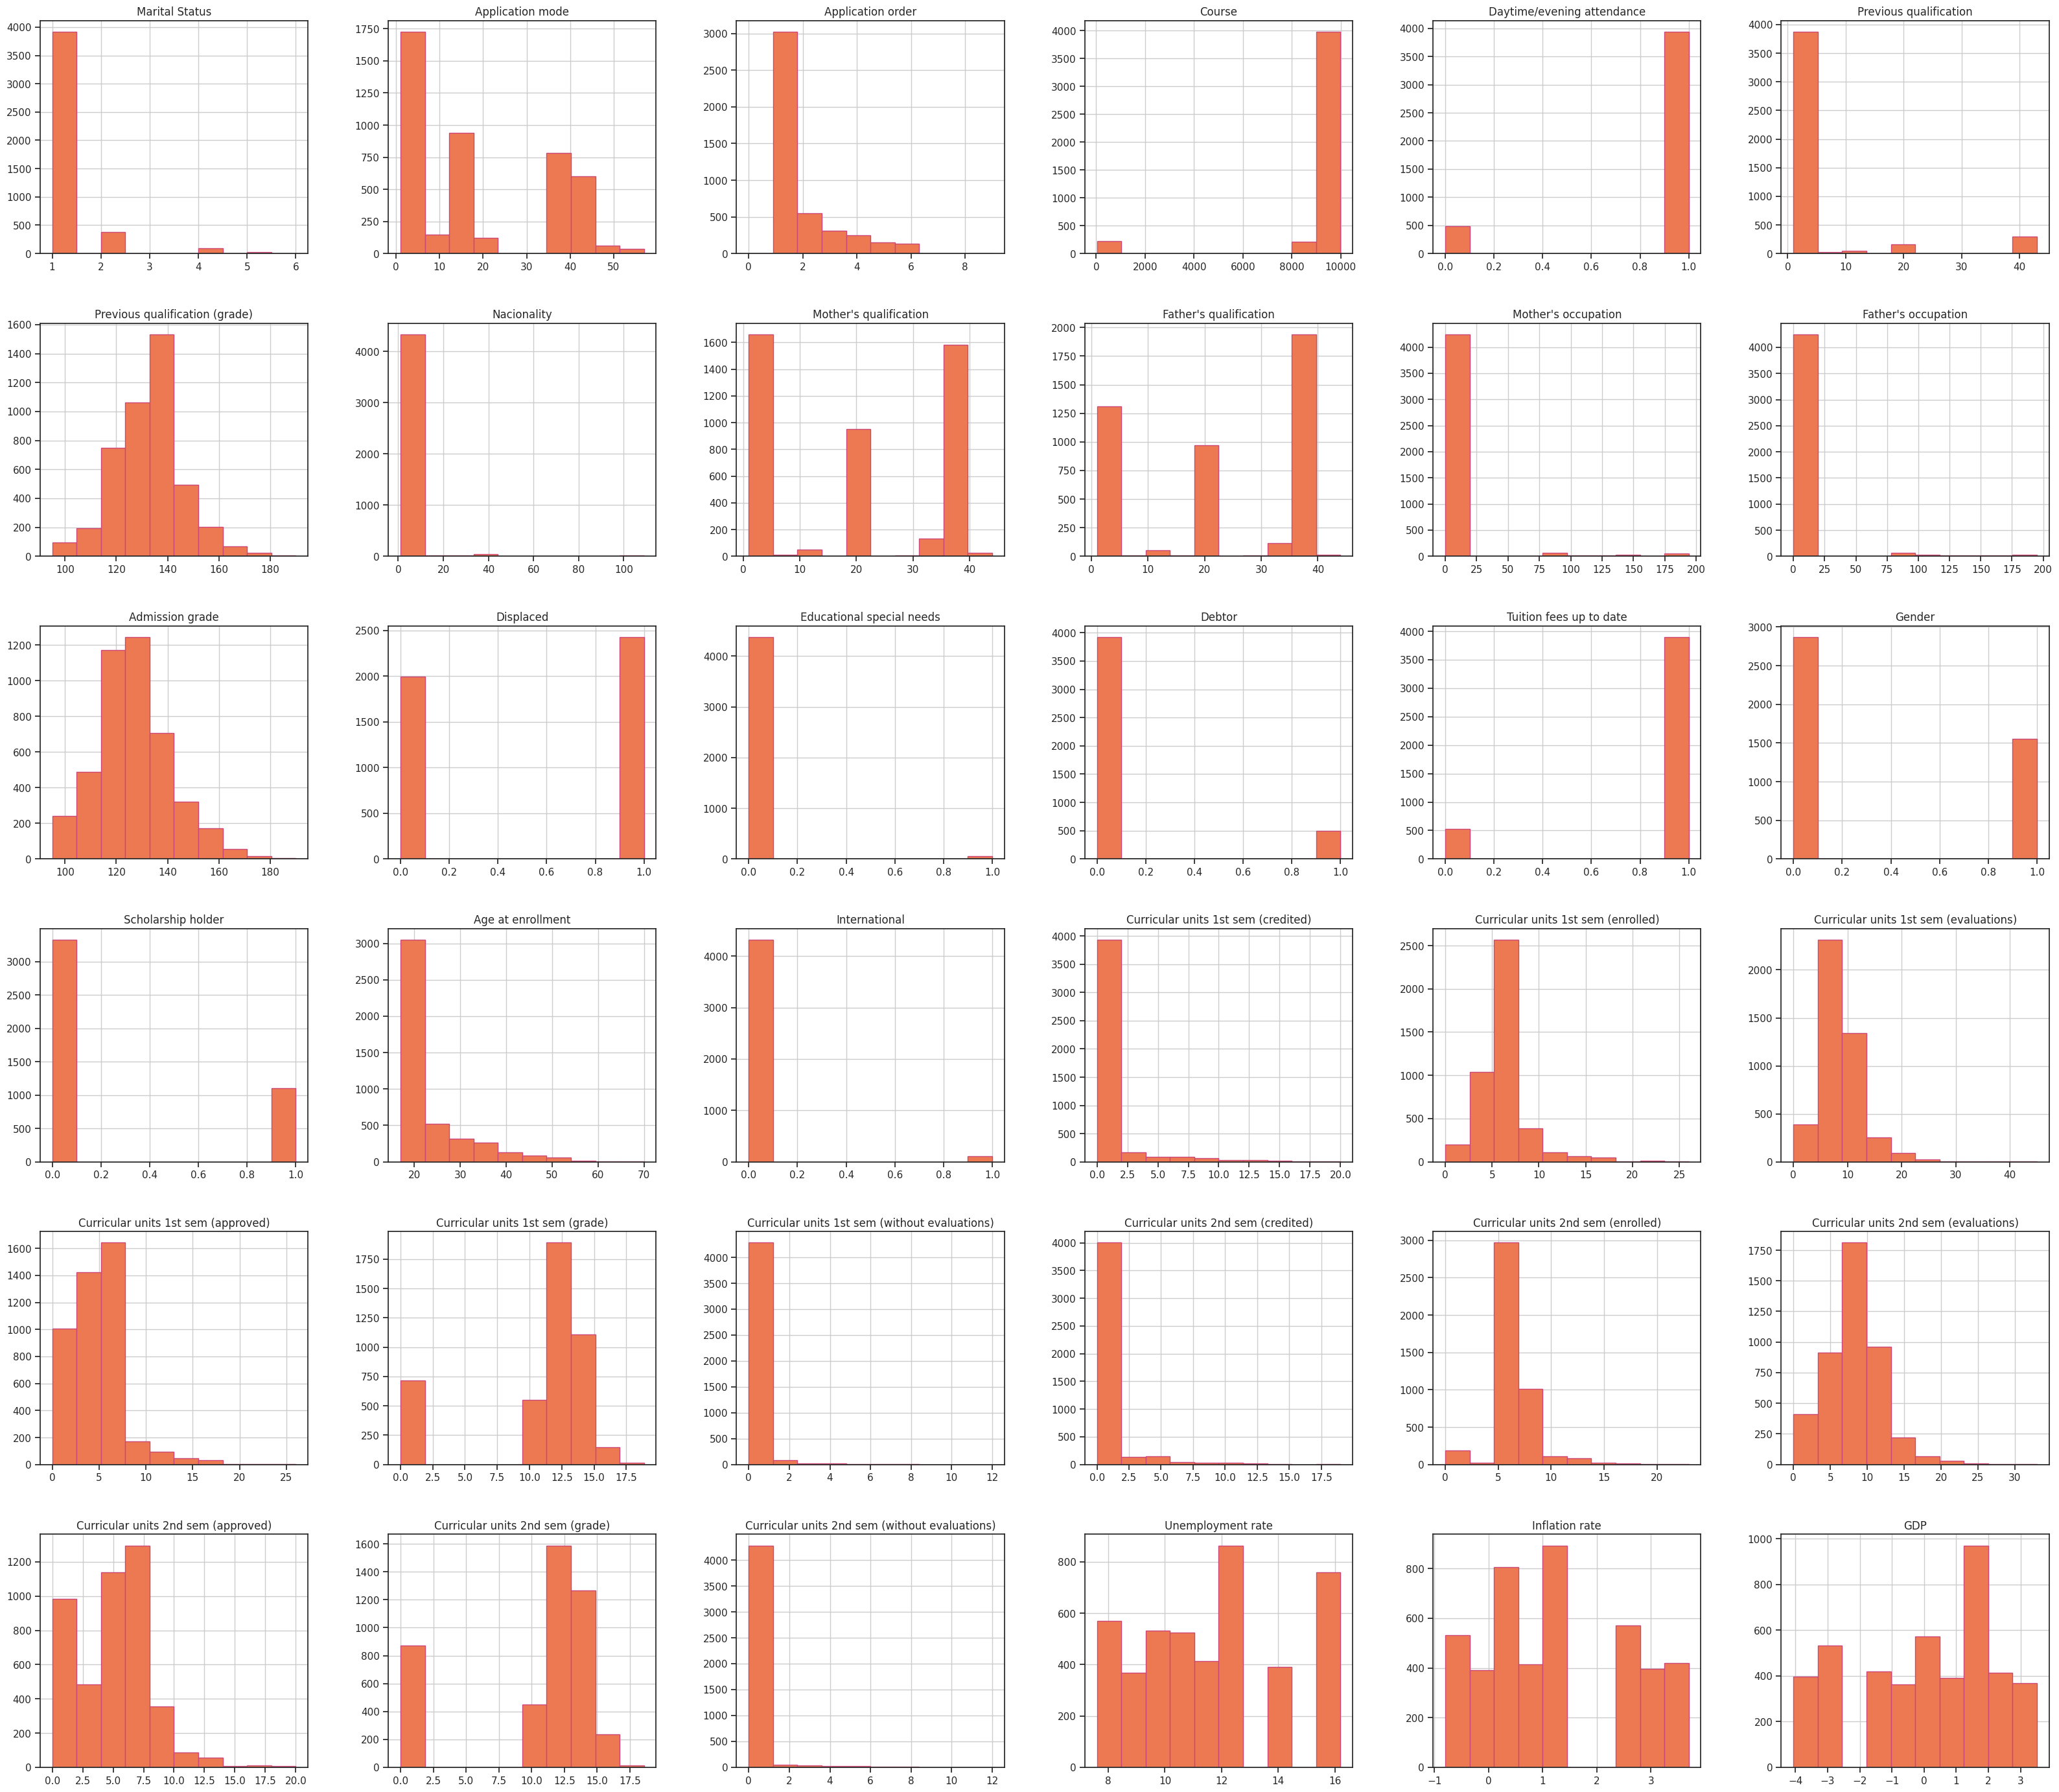

In [ ]:
##histogram - visual representation
sns.set_theme(style = 'ticks')
dades2.features.hist(bins=10, figsize=(40, 35), grid=True, legend=None,colors='');

##Relació de les dades amb l'Objectiu

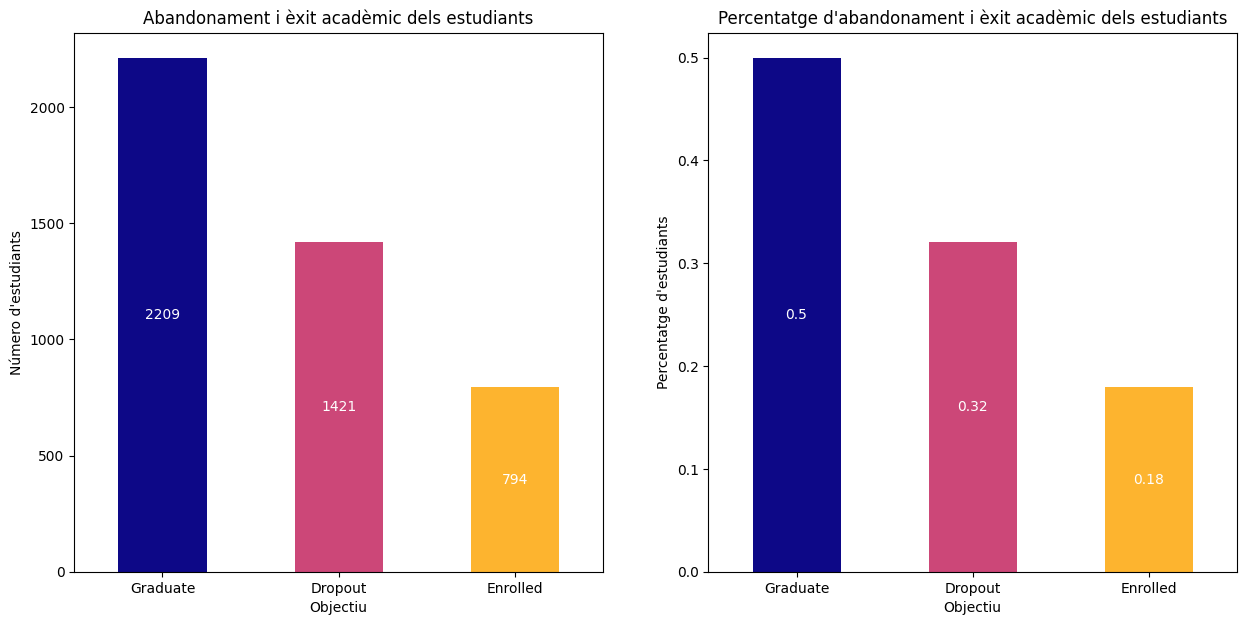

In [ ]:
#Estadistiques OBJECTIU
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
colors =[(0.050383, 0.029803, 0.527975, 1.0), (0.798216, 0.280197, 0.469538, 1.0),(0.993814, 0.704741, 0.183043, 1.0)]

#amb valors reals
dades2.targets["Target"].value_counts().plot.bar(
    ax=axes[0],
    title="Abandonament i èxit acadèmic dels estudiants",
    ylabel="Número d'estudiants",
    xlabel="Objectiu",
    rot=0,
    color=colors
)
#amb percentatges
dades2.targets["Target"].value_counts(normalize=True).plot.bar(
    ax=axes[1],
    title="Percentatge d'abandonament i èxit acadèmic dels estudiants",
    ylabel="Percentatge d'estudiants",
    xlabel="Objectiu",
    rot=0,
    color=colors
)

axes[0].bar_label(axes[0].containers[0], label_type="center", color='w')
axes[1].bar_label(axes[1].containers[0], fmt='%.2g', label_type="center", color='w')

plt.show()

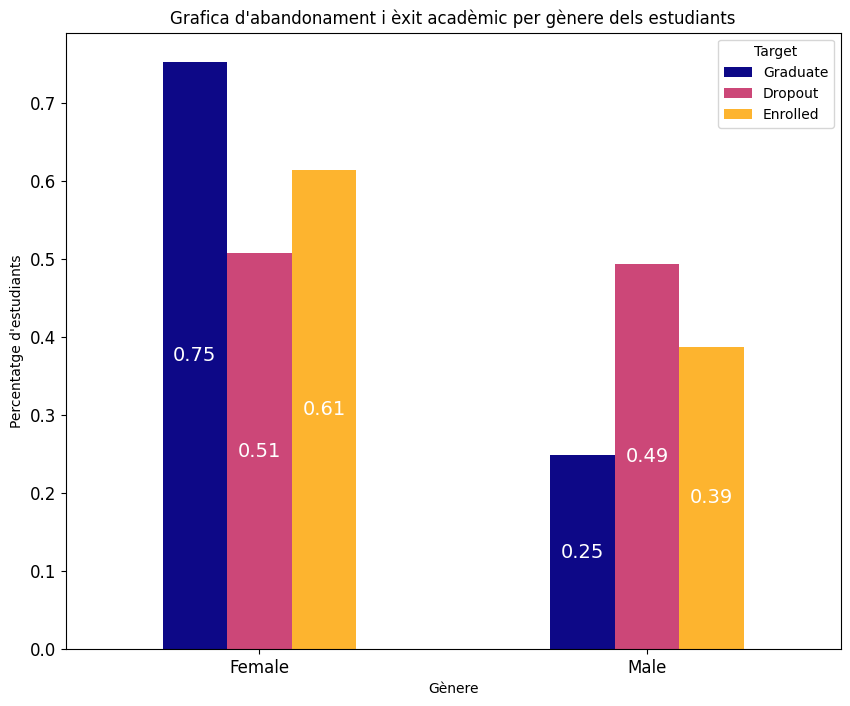

In [ ]:
#Relacio de l'objectiu amb el genere del estudiant
colors =[(0.050383, 0.029803, 0.527975, 1.0), (0.798216, 0.280197, 0.469538, 1.0),(0.993814, 0.704741, 0.183043, 1.0)]

perc1 = pd.crosstab(dades2.targets["Target"], dades2.features["Gender"]).apply(lambda r: r / r.sum(), axis=1)
perc1=perc1.reindex(["Graduate", "Dropout", "Enrolled"])
ax = perc1.transpose().plot.bar(
    figsize = (10,8),
    title = "Grafica d'abandonament i èxit acadèmic per gènere dels estudiants",
    xlabel= "Gènere",
    ylabel = "Percentatge d'estudiants",
    rot=0,
    color=colors,
    fontsize = 12
)
ax.set_xticklabels(("Female", "Male"))

for p in ax.containers:
    ax.bar_label(p, fmt='%.2f',label_type='center', fontsize=14, color='w')


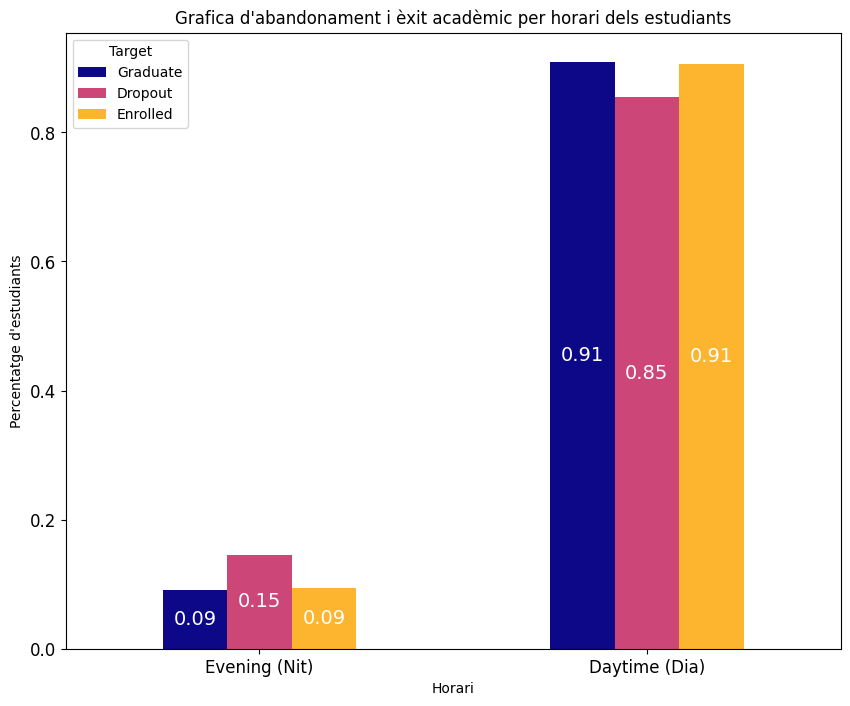

In [ ]:
#Relacio de l'objectiu amb el l'horari del estudiant
colors =[(0.050383, 0.029803, 0.527975, 1.0), (0.798216, 0.280197, 0.469538, 1.0),(0.993814, 0.704741, 0.183043, 1.0)]

perc1 = pd.crosstab(dades2.targets["Target"], dades2.features["Daytime/evening attendance"]).apply(lambda r: r / r.sum(), axis=1)
perc1=perc1.reindex(["Graduate", "Dropout", "Enrolled"])
ax = perc1.transpose().plot.bar(
    figsize = (10,8),
    title = "Grafica d'abandonament i èxit acadèmic per horari dels estudiants",
    xlabel= "Horari",
    ylabel = "Percentatge d'estudiants",
    rot=0,
    color=colors,
    fontsize = 12
)
ax.set_xticklabels(("Evening (Nit)", "Daytime (Dia)"))

for p in ax.containers:
    ax.bar_label(p, fmt='%.2f',label_type='center', fontsize=14, color='w')


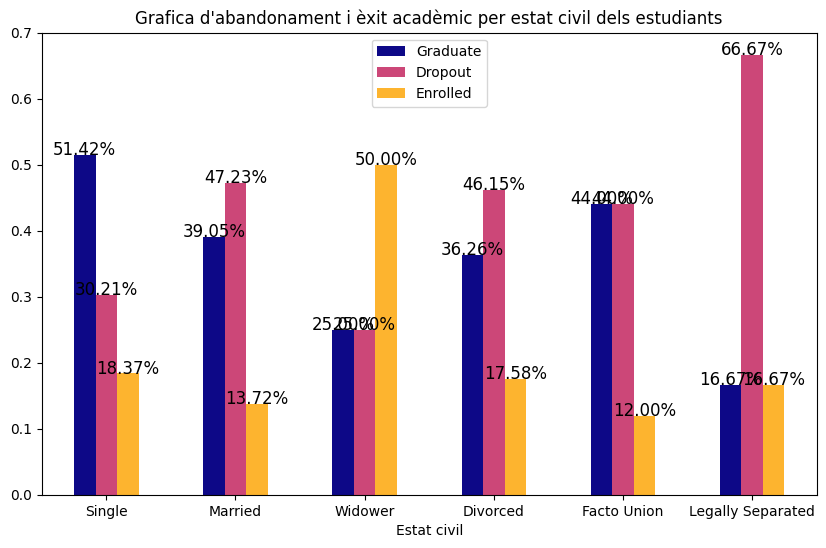

In [ ]:
#Relació de l'objectiu amb l'estat civil dels estudiants

marital_status_perc = pd.crosstab(dades2.features["Marital Status"], dades2.targets["Target"], normalize='index')
marital_status_perc = marital_status_perc.reindex(columns=["Graduate", "Dropout", "Enrolled"])
colors = [(0.050383, 0.029803, 0.527975, 1.0),
          (0.798216, 0.280197, 0.469538, 1.0),
          (0.993814, 0.704741, 0.183043, 1.0)]

ax = marital_status_perc.plot(kind="bar", figsize=(10, 6), title="Grafica d'abandonament i èxit acadèmic per estat civil dels estudiants", color=colors)

plt.xlabel("Estat civil")
plt.xticks([0, 1, 2, 3, 4, 5], ['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Separated'], rotation=0)

# Llegenda
ax.legend(["Graduate", "Dropout", "Enrolled"], loc=9)

#calcular percentatges per cada apartat
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height), ha='center', fontsize=12)

plt.show()

#   Preprocessament de les dades

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


In [27]:
#tornar a carregar dades per possibles modificacions anteriors des del DRIVE
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')
dades_p = pd.read_csv('drive/My Drive/MIDA/data.csv',sep=';')

dades_p.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
#mirar si hi han atributs buits
atr_buit = dades_p.columns.isnull().sum()

#mirar si hi han objectiu buit
obj_buit = dades_p["Target"].isnull().sum()

print("Valors buits dels atributs: ")
print(atr_buit)

print("\nValors buits del objectiu: ")
print(obj_buit)


Valors buits dels atributs: 
0

Valors buits del objectiu: 
0


In [23]:
#mirar si hi han files duplicades
dup_fil =dades_p[dades_p.duplicated(keep=False)]
dup_num = dup_fil.sum()

print("Numero de files duplicades:")
print(dup_num)

#mirar les files duplicades
files = dades_p[dup_fil]
print("Files duplicades :")
print(files)

print("Si llista surt NAN significa que no hi ha cap fila duplicada")

Numero de files duplicades:
Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance\t                      0.0
Previous qualification                            0.0
Previous qualification (grade)                    0.0
Nacionality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Admission grade                                   0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0


###Atributs no relacionats amb l'objectiu
Revisar cada atribut la seva relació amb l'objectiu, eliminar els possibles outliers o els que poguessin afectar a la predicció d'aquest.

Treure els estudiants que estan estudiant actualment ja que només volem els que ja s'han graduat o ho han abandonat.

Treure els atributs que observant les gràfiques anteriors i les que hi ha a continuació, podrien afectar al resultat.

In [40]:
dades_p.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [41]:
print("Verificar que tots els atributs i targets siguin de tipus numeral")
dades_p.info()

Verificar que tots els atributs i targets siguin de tipus numeral
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance	                     3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630

In [29]:
#Target orignalment de tipus categoric
# Eliminar els estudiants que estan actualment estudiant
print("Abans treure estudiants que actualment esta estudien: ")
print(dades_p.loc[:,'Target'].value_counts())

#Treure els estudiants Enrolled -> fixarem en si s'han graduat o no
print("Despres de treure els estudiants que actualment estudien: ")
dades_p=dades_p.loc[(dades_p['Target']=='Graduate') | (dades_p['Target'] == 'Dropout')]
print(dades_p.loc[:,'Target'].value_counts())

#Canviar de categoric a NUMERAL
print("----------")
print("Canviar el target d'un atribut categoric a numeral: ")
dades_p['Target'] =LabelEncoder().fit_transform(dades_p['Target'])
print(dades_p.loc[:,'Target'].value_counts())

print("--> 1 son els estudiants que s'han graduat i 0 els que no ho han fet")

Abans treure estudiants que actualment esta estudien: 
Graduate    2209
Dropout     1421
Name: Target, dtype: int64
Despres de treure els estudiants que actualment estudien: 
Graduate    2209
Dropout     1421
Name: Target, dtype: int64
----------
Canviar el target d'un atribut categoric a numeral: 
1    2209
0    1421
Name: Target, dtype: int64
--> 1 son els estudiants que s'han graduat i 0 els que no ho han fet


In [39]:
dades_p.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [48]:
#Dividir els atributs per tipus i veure la seva relació amb l'objectiu

#Dades demogràfiques
demo= dades_p[["Marital status", "Nacionality", "Displaced", "Gender",
              "Educational special needs", "Age at enrollment", "International", "Target"]]

#Dades Socio Economiques
soec=dades_p[["Mother's qualification", "Father's qualification", "Mother's occupation",
             "Father's occupation",
      "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

#Dades academiques
acad=dades_p[['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t',
             'Previous qualification','Previous qualification (grade)',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]

#Dades del proces inscripció
insc=dades_p[['Unemployment rate', 'Inflation rate','Admission grade','GDP','Target']]

#Comprovar que tots els atributs han estat redistribuits
atributs_falten = set(dades_p.columns) - set(soec.columns)- set(demo.columns)- set(acad.columns)- set(insc.columns)
print("Els atributs que falta redistribuir: ",atributs_falten)

Els atributs que falta redistribuir:  set()


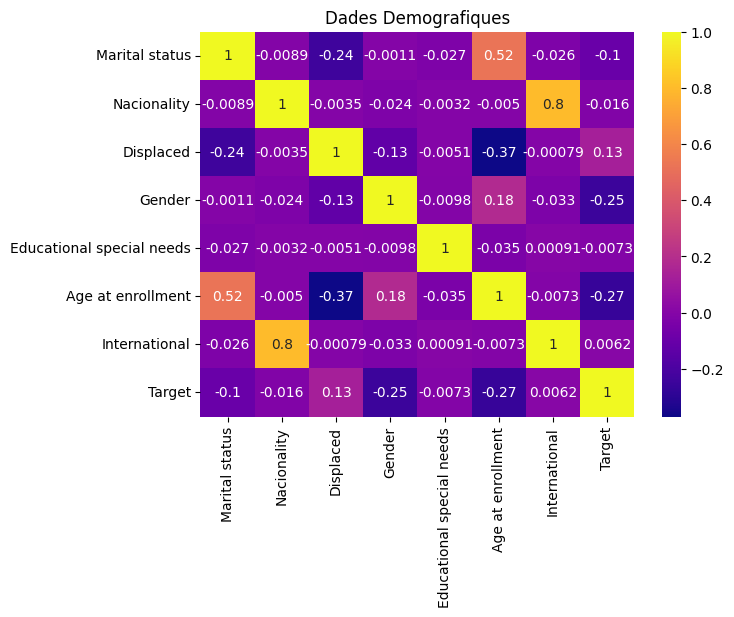

In [55]:
#Veure la relació amb l'objectiu fent servir matrius de corelació- heatmaps

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(demo.corr(), annot=True, cmap="plasma")
plt.title("Dades Demografiques")
plt.show()

Es pot observar que els atributs que tenen més correlació són: **International/Nacionality**

Els atributs que borrarem:
*   Nacionality

  La majoria d'estudiants son *Portuguesos* i ens podria portar problemes d'influència en els models de classificació

Els altres atributs tenen una correlació correcta amb el Target.

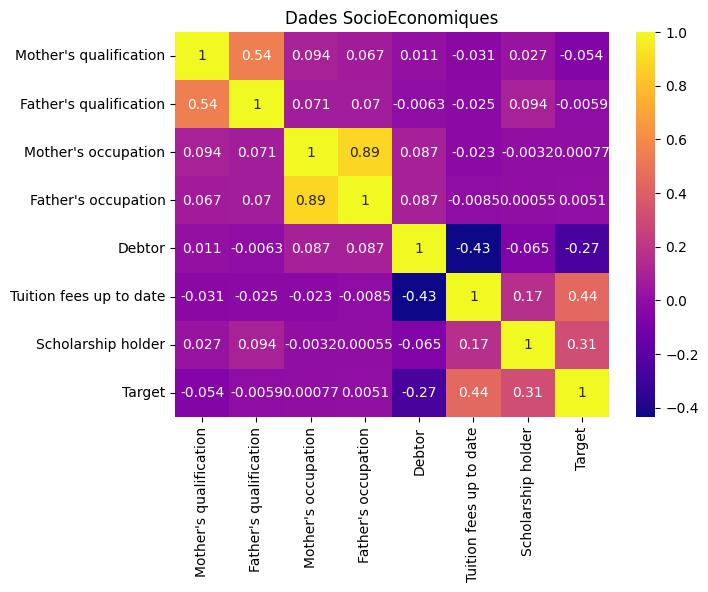

In [52]:
#Veure la relació amb l'objectiu fent servir matrius de corelació- heatmaps

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(soec.corr(), annot=True, cmap="plasma")
plt.title("Dades SocioEconomiques")
plt.show()

Es pot observar que els atributs que tenen més correlació són: **Father's ocupation/Mother's ocupation**  pero és un atribut interessant per veure la seva influència en els models aixi que no els borrarem.

Els altres atributs tenen una correlació correcta amb el Target.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


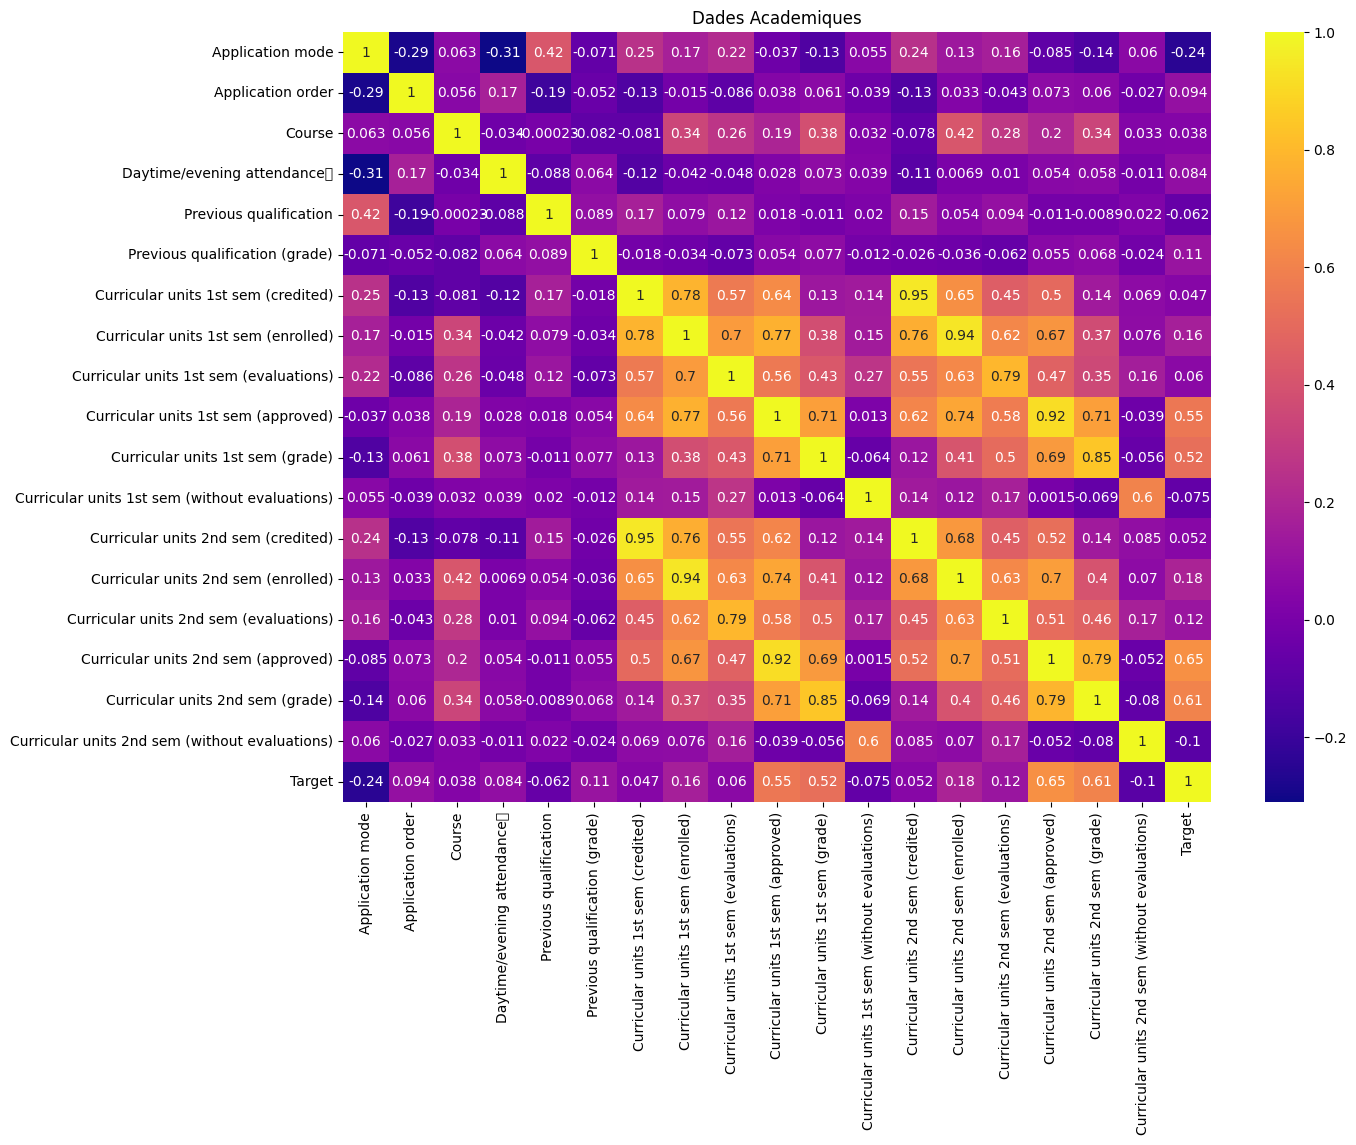

In [53]:
#Veure la relació amb l'objectiu fent servir matrius de corelació- heatmaps

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(acad.corr(), annot=True, cmap="plasma")
plt.title("Dades Academiques")
plt.show()

Es pot observar que els atributs que tenen més correlació són:
**Curricular units 1st/2nd sem (credited)**

**Curricular units 1st/2nd sem (enrolled)**

**Curricular units 1st/2nd sem (evaluations)**

**Curricular units 1st/2nd sem (approved)**

**Curricular units 1st/2nd sem (grade)**

 Prou elevats ( 0.80 en amunt) per afectar en el dataset.

Els atributs que borrarem :

*  Curricular units 1st sem (credited)

* Curricular units 1st sem (enrolled)

* Curricular units 1st sem (evaluations)

* Curricular units 1st sem (approved)

* Curricular units 1st sem (grade)

  Borrarem totes les unitats de *1st sem* ja que el *2nd sem* tenen més correlació amb l'objectiu

Els altres atributs tenen una correlació correcta amb el Target.

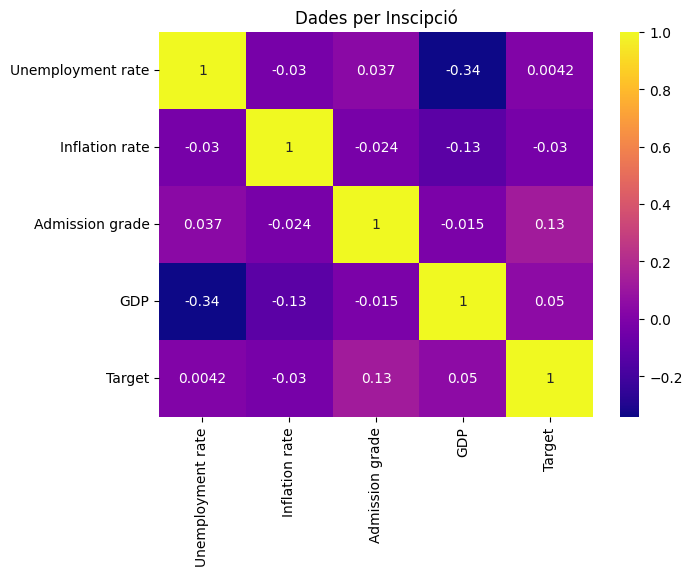

In [54]:
#Veure la relació amb l'objectiu fent servir matrius de corelació- heatmaps

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(insc.corr(), annot=True, cmap="plasma")
plt.title("Dades per Inscipció")
plt.show()

Els atributs tenen una correlació correcta amb el target

Vistes les totes les correlacions dels atributs amb l'objectiu, hi han alguns que s'hauran de retirar del dataset perque els models de classifiació els  influencii, millorar la simplicitat del dataset i evitar possible overfiting de dades

In [73]:
#Atributs amb alta correlació amb l'objectiu treure del dataset
atributs_treure=dades_p[[
    'Nacionality','Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)'
]]
dades_noat=dades_p.copy()
dades_noat.drop(columns=atributs_treure.columns, inplace=True)

dades_noat.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,19,12,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,37,37,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,38,37,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,37,38,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [74]:
#Comprovació del preprocessament
dades_og= pd.read_csv('drive/My Drive/MIDA/data.csv',sep=';')
print("Dades originals:",dades_og.shape)
print("Dades sent preprocessades: (nomes graduats/no graduats) ",dades_p.shape)
print("Dades completament preprocessades (no atributs influenciables):",dades_noat.shape)

Dades originals: (4424, 37)
Dades sent preprocessades: (nomes graduats/no graduats)  (3630, 37)
Dades completament preprocessades (no atributs influenciables): (3630, 31)


S'han eliminat correctament els atributs triats i passa a ser un dataset de 37 columnes a 31 columnes amb tots els atributs numerals (no categorics) i amb només els estudiants o que ja s'han graduat o han abandonat

# Data mining models


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


In [ ]:
#tornar a carregar dades per possibles modificacions anteriors des del DRIVE
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/MIDA/data.csv',sep=';')

data.head()

Mounted at /content/drive


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
#No fent servir collab notebook
#Tenint el dataset a la mateixa carpeta del programa

#df=pd.read_csv('data.csv',sep=';')
#df.head()

####Treure els Outliers del dataset

In [ ]:
# ELiminar els estudiants que estan actualment estudiant
dm_data=data.copy()
print("Abans treure estudiants que actualment esta estudien: ")
print(dm_data.loc[:,'Target'].value_counts())

#Treure els estudiants Enrolled -> fixarem en si s'han graduat o no
print("Despres de treure els estudiants que actualment estudien: ")
dm_data=dm_data[(dm_data['Target']=='Graduate') | (dm_data['Target'] == 'Dropout')]
print(dm_data.loc[:,'Target'].value_counts())

#Canviar de categoric a NUMERAL
print("----------")
print("Canviar el target d'un atribut categoric a numeral: ")
dm_data['Target'] = LabelEncoder().fit_transform(dm_data['Target'])
print(dm_data.loc[:,'Target'].value_counts())

print("--> 1 son els estudiants que s'han graduat i 0 els que no ho han fet")

Abans treure estudiants que actualment esta estudien: 
Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64
Despres de treure els estudiants que actualment estudien: 
Graduate    2209
Dropout     1421
Name: Target, dtype: int64
----------
Canviar el target d'un atribut categoric a numeral: 
1    2209
0    1421
Name: Target, dtype: int64
--> 1 son els estudiants que s'han graduat i 0 els que no ho han fet


In [ ]:
#identifying outliers
# Calculating the Z-score for each data point
z_scores = np.abs(stats.zscore(dm_data))

# Finding data points with a Z-score greater than 3
outliers = np.where(z_scores > 3)

print(outliers)

(array([   0,    5,    5, ..., 3628, 3629, 3629]), array([ 3, 19, 32, ...,  6,  7, 20]))


In [ ]:
out_df = dm_data.drop(dm_data.index[outliers[0]])

# Resetting the index of the dataframe
dm_data = out_df.reset_index(drop=True)

print(dm_data.shape)
print(dm_data.loc[:,'Target'].value_counts())

(2529, 37)
1    1596
0     933
Name: Target, dtype: int64


###Single Fold Cross Validation


Evitar overfitting:
n_estimators: numero petit per no crear un model massa complex que tingui overfitting
 min_samples_split: divisions mini mes per cada node intern del arbre
 min_sample_leaf: minim numero de fulles per cada node


In [ ]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
#eliminar columna TARGET del dataset
feature_columns = [col for col in dm_data.columns if col != 'Target']
dm_data[feature_columns] = scaler.fit_transform(dm_data[feature_columns])

X = dm_data.drop('Target', axis=1) #guardar a X tots els atributs MENYS TARGET
y = dm_data['Target'] #guardar a Y el target

scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=10)

# Define the  grid
param_grid = {'max_depth': [5, 10, 15, 20, None]}
#Grid busqueda per cassificador validation
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=20), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Millor  max_depth trobada:', grid_search.best_params_['max_depth'])

Millor  max_depth trobada: 15


Training Accuracy : 0.9663865546218487
Testing Accuracy : 0.9426877470355731

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       200
           1       0.93      0.98      0.95       306

    accuracy                           0.94       506
   macro avg       0.95      0.93      0.94       506
weighted avg       0.94      0.94      0.94       506


CONFUSION MATRIX


<Axes: >

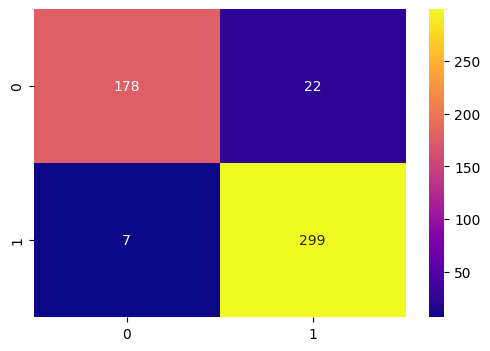

In [ ]:
#Classificadors
rf = RandomForestClassifier(n_estimators=50,max_depth=grid_search.best_params_['max_depth'],min_samples_split=4, min_samples_leaf=2, random_state=20)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

print('Training Accuracy :',rf.score(X_train,y_train))
print('Testing Accuracy :',rf.score(X_test,y_test))
# Make predictions on the test data
y_pred2 = rf.predict(X_test)

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred2))

# calculating confusion matrix
cm = confusion_matrix(y_test, y_pred2)

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")

### K-Fold Cross Validation


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       211
           1       0.91      0.99      0.95       295

    accuracy                           0.93       506
   macro avg       0.94      0.92      0.93       506
weighted avg       0.94      0.93      0.93       506


CONFUSION MATRIX


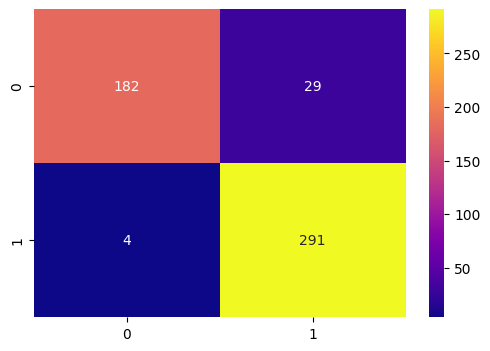

Average Accuracy: 0.9243552132991077
Average Precision: 0.9260827805848317
Average Recall: 0.9243552132991077
Average F1 Score: 0.9230360750848348


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
feature_columns = [col for col in dm_data.columns if col != 'Target']
dm_data[feature_columns] = scaler.fit_transform(dm_data[feature_columns])

X = dm_data.drop('Target', axis=1) #guardar a X tots els atributs MENYS TARGET
y = dm_data['Target'] #guardar a Y el target

# Split data into a separate training and testing set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Fold Cross-Validation setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists for metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X_train_full, y_train_full):
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[test_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Calculate metrics
    accuracies.append(accuracy_score(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred, average='weighted'))
    recalls.append(recall_score(y_val, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_val, y_pred, average='weighted'))

# Final evaluation on the held-out test set
final_pred = model.predict(X_test)
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, final_pred))
cm = confusion_matrix(y_test, final_pred)
print('\nCONFUSION MATRIX')
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")
plt.show()

# Print average metrics from cross-validation
print(f"Average Accuracy: {sum(accuracies) / len(accuracies)}")
print(f"Average Precision: {sum(precisions) / len(precisions)}")
print(f"Average Recall: {sum(recalls) / len(recalls)}")
print(f"Average F1 Score: {sum(f1_scores) / len(f1_scores)}")


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
X_train_all = dm_data.drop(columns=['Target'])
X_test_all = dm_data.drop(columns=['Target'])

sc = StandardScaler()
X_train_all = sc.fit_transform(X_train_all)
X_test_all = sc.transform(X_test_all)

gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=1.0,max_depth= 5,
    max_features= 0.4, subsample= 1, random_state=0)
kfold_validation = KFold(10)
results = cross_val_score(gbc, X,y, cv=kfold_validation)
print(results)
print(np.mean(results))

[0.94466403 0.90513834 0.92094862 0.90909091 0.90118577 0.92094862
 0.92490119 0.90118577 0.92885375 0.94047619]
0.9197393186523621


# Machine learning methods


### Naı̈ve Bayes

Think about hypothesis of independence of variables.
Do you have enough number of elements to obtain reliable probabilities?


In [ ]:
#Load of ionosphere data set
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np

url="https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data"
df=pd.read_csv(url,header=None)
df.head()
# Separation into data and label

X = df.drop([34],axis=1).as_matrix()         # Data
y = df[34].as_matrix()
print(X.shape)
print(y.shape)

# Train on data. No parameters to adjust

from sklearn.naive_bayes import GaussianNB       ### Because continuous data
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.neighbors as nb

cv = StratifiedKFold(n_splits=10, random_state=1)

gnb = GaussianNB()
cv_scores = cross_val_score(gnb,X=X,y=y,cv=cv)
np.mean(cv_scores)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predicted = cross_val_predict(GaussianNB(), X=X, y=y,  cv=cv)

print(confusion_matrix(y, predicted))
print(accuracy_score(y, predicted))
from sklearn.metrics import classification_report

print(classification_report(y, predicted))
## Adjusting probability threshold
# Focus on predict class 1

y2 = np.zeros((y.shape))
y2[y=='b']=1
y2[y=='g']=0


(X_train, X_test,  y_train, y_test) = train_test_split(X, y2, test_size=.3, random_state=1)


from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

def filterp(th,ProbClass1):
    """ Given a treshold "th" and a set of probabilies of belonging to class 1 "ProbClass1", return predictions """
    y=np.zeros(ProbClass1.shape[0])
    for i,v in enumerate(ProbClass1):
        if ProbClass1[i]>th:
            y[i]=1
    return y

clf = GaussianNB()
lth=[]

# We do a 10 fold crossvalidation with 10 iterations
kf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train, y_train):
    X_train2, X_test2 = X[train_index], X[test_index]
    y_train2, y_test2 = y2[train_index], y2[test_index]

    # Train with the training data of the iteration
    clf.fit(X_train2, y_train2)
    # Obtaining probablity predictions for test data of the iterarion
    probs = clf.predict_proba(X_test2)
    # Collect probabilities of belonging to class 1
    ProbClass1 = probs[:,1]
    # Sort probabilities and generate pairs (threshold, f1-for-that-threshold)
    res = np.array([[th,f1_score(y_test2,filterp(th,ProbClass1),pos_label=1)] for th in np.sort(ProbClass1)])

    # Uncomment the following lines if you want to plot at each iteration how f1-score evolves increasing the threshold
    #plt.plot(res[:,0],res[:,1])
    #plt.show()

    # Find the threshold that has maximum value of f1-score
    maxF = np.max(res[:,1])
    pl = np.argmax(res[:,1])
    optimal_th = res[pl,0]

    # Store the optimal threshold found for the current iteration
    lth.append(optimal_th)

# Compute the average threshold for all 10 iterations
thdef = np.mean(lth)
print("Selected threshold in 10-fold cross validation:", thdef)
print()


# Train a classifier with the whole training data
clf = GaussianNB()
clf.fit(X_train, y_train)
# Obtain probabilities for data on test set
probs = clf.predict_proba(X_test)
# Generate predictions using probabilities and threshold found on 10 folds cross-validation

pred = filterp(thdef,probs[:,1])
# Print results with this prediction vector
print(classification_report(y_test, pred))

# Ignore warnings explaining that in some iterations f1 score is 0
clf = GaussianNB()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(classification_report(y_test, pred))

### k-NN

In [ ]:
X_new = SelectKBest(mutual_info_classif, k=2).fit_transform(X, y)

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_new, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_new, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed
clf.fit(X_new, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

### Decision Trees

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def display_confusion_matrix(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return cm

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       211
           1       0.90      0.92      0.91       295

    accuracy                           0.90       506
   macro avg       0.89      0.89      0.89       506
weighted avg       0.90      0.90      0.90       506



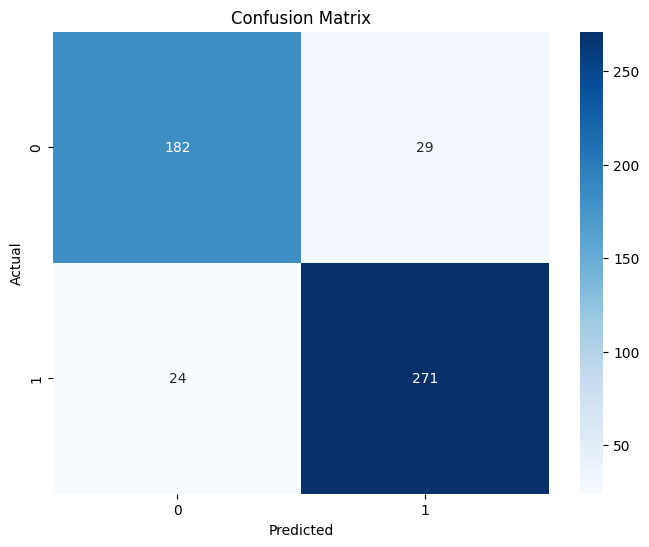

NameError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

#https://github.com/nravi95/Predictive-analysis-on-Students-Dropout-and-Academic-Success-by-using-machine-learning-models./blob/main/students%20project%20(1)%20(3).ipynb

model_2_1 = DecisionTreeClassifier(random_state=1)
model_2_1.fit(X_train,y_train)

print(metrics.classification_report(y_test, model_2_1.predict(X_test)))

score_2_1 = display_confusion_matrix(model_2_1, X_test, y_test)
acc_table['Model 2-1 : Decision Tree'] = score_2_1

### Support Vector Machines

In [ ]:
#https://github.com/nravi95/Predictive-analysis-on-Students-Dropout-and-Academic-Success-by-using-machine-learning-models./blob/main/students%20project%20(1)%20(3).ipynb

### Meta-learning algorithms